In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Stationery_inventory_data.csv")

In [3]:
df = df[["Availability", "Number of products sold", "Order quantities", "Production volumes", "Inspection results", "Defect rates"]]

In [4]:
df["Inspection results"].unique()

array(['Pending', 'Fail', 'Pass'], dtype=object)

In [5]:
mapping = {'Fail': -1, 'Pass': 1, 'Pending': 0}
df.loc[:, 'Inspection results'] = df['Inspection results'].map(mapping).fillna(0)

In [6]:
df["Inspection results"].unique()

array([0, -1, 1], dtype=object)

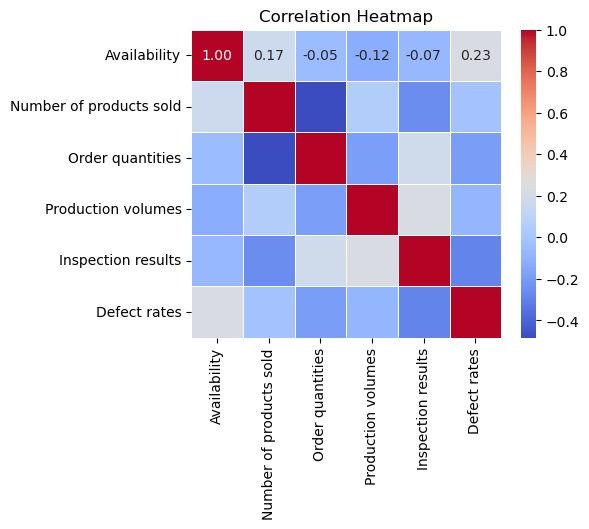

In [7]:
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

X = df[["Availability", "Number of products sold", "Order quantities", "Production volumes", "Inspection results"]]
y = df["Defect rates"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, batch_size=3, validation_split=0.2)

predictions = model.predict(X_test)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 1417.9811 - val_loss: 953.4116
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 599.8772 - val_loss: 1125.3545
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 424.2243 - val_loss: 48.4315
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 101.0926 - val_loss: 223.6511
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 254.2824 - val_loss: 58.7861
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.9381 - val_loss: 37.2234
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 62.5338 - val_loss: 43.3244
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 34.5147 - val_loss: 16.3416
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30.7604 - val_loss: 15.9452
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.0243 - val_loss: 22.5790
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 18.4642 - val_loss: 25.7462
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Mean Squared Error (MSE): 83.46301
R-squared (R²): -63.10731661490529


In [10]:
import pickle

filename = "Stationery_inventory_data_deficit_rates.pkl"

with open(filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model successfully saved to {filename}")

Model successfully saved to Stationery_inventory_data_deficit_rates.pkl
